# Decision Trees

#EN
In this challenge, we will use decision trees in both a classification and regression task. We visualize each of these representations. We will use the `mpg` dataset. It's a car dataset.

# FR
Dans ce défi, nous allons utiliser des arbres de décision à la fois dans une tâche de classification et de régression. Nous visualiserons chacune de ces représentations. Nous utiliserons le jeu de données `mpg`. C'est un jeu de données sur les voitures.

# MISSION 1 : Regression Trees

# Exercice 1
# EN
- Drop the rows with missing values
- Drop the "name" column
- Transform the "origin" column (encode it) to represent the following:
  - USA = 0, Japan = 1, Europe = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Supprimez la colonne "nom"
- Transformez la colonne "origine" (encodez-la) pour représenter ce qui suit :
  - États-Unis = 0, Japon = 1, Europe = 2

In [1]:
# Load in the necessary libraries and the dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

data = sns.load_dataset("mpg")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [2]:
# EXERCICE 1
# Suppression des lignes avec des valeurs manquantes
data = data.dropna()

# Suppression de la colonne "nom"
data = data.drop(columns=["name"])

# Encodage de la colonne "origine"
data["origin"] = data["origin"].map({"usa": 0, "japan": 1, "europe": 2})

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,0
396,28.0,4,120.0,79.0,2625,18.6,82,0


# Exercice 2
# EN
- Prepare your X and y (mpg column) as a target.
- Split into train and test splits using random state of 42 and a test size of 20%.

# FR
- Préparez votre X et y (colonne mpg) comme cible.
- Diviser le dataset en 2 parties (entraînement et test) en utilisant un état aléatoire de 42 et une taille de test de 20 %.

In [3]:
# Exercice 2
# Préparez votre X et y (colonne mpg) comme cible.
y = data["mpg"]
X = data.drop(columns=["mpg"])

# Diviser le dataset en 2 parties (entraînement et test) en utilisant un état aléatoire de 42 et une taille de test de 20 %.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérification des dimensions
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (313, 7), X_test shape: (79, 7)
y_train shape: (313,), y_test shape: (79,)


# Exercice 3

# EN
-  Fit a decision tree (Regression)

# FR
- Entraîne l'arbre de decision (Regression)

In [18]:
# Exercice 3
from sklearn.tree import DecisionTreeRegressor

# Initialisation du modèle
regressor = DecisionTreeRegressor(random_state=42)

# Entraînement du modèle
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

# Exercice 4

# EN
- Predict on the xtest set

# FR
- Réalise une prédiction sur le X_test.

In [20]:
# Exercice 4
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)


# Exercice 5

# EN
- Print out the R2 score (train and test data).

# FR
- Affiche le score R2 (Entraînement et test).

In [21]:
# Exercice 5
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Affichage des résultats
print(f"Score R² sur l'entraînement : {r2_train:.4f}")
print(f"Score R² sur le test : {r2_test:.4f}")


Score R² sur l'entraînement : 1.0000
Score R² sur le test : 0.7867


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.



In [22]:
# Exercice 6
feature_importance = regressor.feature_importances_
importance_df = pd.DataFrame({"Caractéristique": X.columns, "Importance (%)": feature_importance * 100})
importance_df = importance_df.sort_values(by="Importance (%)", ascending=False)
print(importance_df)


  Caractéristique  Importance (%)
1    displacement       63.130705
2      horsepower       16.955593
5      model_year       10.412061
3          weight        6.356064
4    acceleration        2.533169
6          origin        0.379426
0       cylinders        0.232982


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

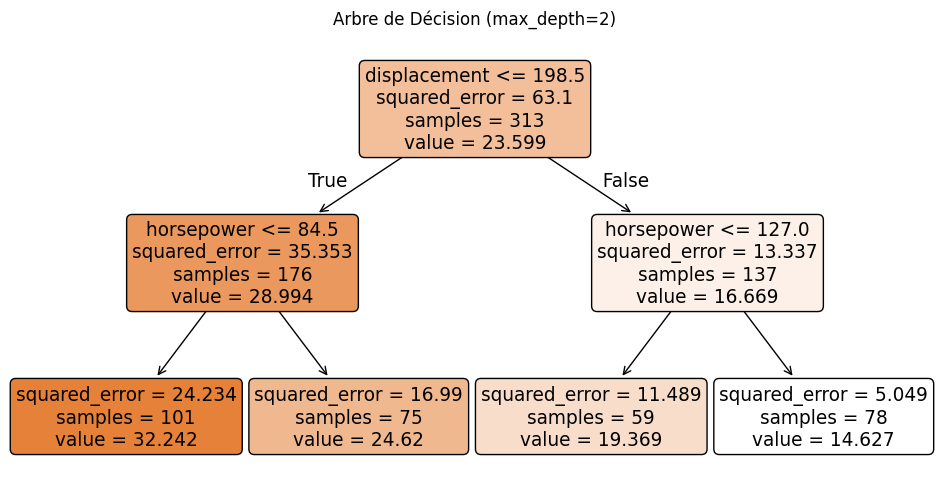

In [26]:
# EXERCICE 7
from sklearn.tree import plot_tree

regressor_limited = DecisionTreeRegressor(max_depth=2, random_state=42)
regressor_limited.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(regressor_limited, feature_names=X.columns, filled=True, rounded=True)
plt.title("Arbre de Décision (max_depth=2)")
plt.show()

# MISSION 2 : Classification Trees

# EXERCICE 1

# EN
- Drop rows with missing values
- Turn the species column into numeric (encode it) :
  - Specifically, Adelie = 0, Chinstrap = 1, and Gentoo = 2
- Turn the island column into numeric (encode it) :
  - Specifically, Torgersen = 0, Biscoe = 1, Dream = 2

# FR
- Supprimer les lignes avec des valeurs manquantes
- Transformez la colonne des espèces en numérique (encodez-la) :
  - Plus précisément, Adelie = 0, Chinstrap = 1 et Gentoo = 2
- Transformez la colonne 'island' en numérique (encodez-la) :
  - Plus précisément, Torgersen = 0, Biscoe = 1, Dream = 2

In [27]:
# Load in the Penguins dataset
data = sns.load_dataset('penguins')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [28]:
# Exercice 1
data = data.dropna()
data['species'] = data['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
data['island'] = data['island'].map({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2})
data


<ipython-input-28-c09ae916dead>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['species'] = data['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
<ipython-input-28-c09ae916dead>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['island'] = data['island'].map({'Torgersen': 0, 'Biscoe': 1, 'Dream': 2})


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,Male
1,0,0,39.5,17.4,186.0,3800.0,Female
2,0,0,40.3,18.0,195.0,3250.0,Female
4,0,0,36.7,19.3,193.0,3450.0,Female
5,0,0,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,2,1,47.2,13.7,214.0,4925.0,Female
340,2,1,46.8,14.3,215.0,4850.0,Female
341,2,1,50.4,15.7,222.0,5750.0,Male
342,2,1,45.2,14.8,212.0,5200.0,Female


# EXERCICE 2

# EN
- Save as variable your X and your y (column "sex")
- Using a random state of 42 and a test size of 0.20, split in training and testing sets.

# FR
- Enregistrez comme variable votre X et votre y (colonne "sex")
- Utilisation d'un état aléatoire de 42 et d'une taille de test de 0.20, divisé en ensembles d'apprentissage et de test.

In [29]:
# Exercice 2
from sklearn.model_selection import train_test_split

# Enregistrez comme variable votre X et votre y (colonne "sex")
y = data["sex"]
X = data.drop(columns=["sex"])

# Utilisation d'un état aléatoire de 42 et d'une taille de test de 0.20, divisé en ensembles d'apprentissage et de test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (266, 6), X_test shape: (67, 6)
y_train shape: (266,), y_test shape: (67,)


# EXERCICE 3
# EN

-  Fit a decision tree (Classification)

# FR
- Entraîne l'arbre de decision (Classification)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Création et entraînement du modèle
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Exercice 4

# EN
- Predict on the X_test set

# FR
- Réalise une prédiction sur le X_test.

In [32]:
# Exercice 4
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Exercice 5

# EN
- Print the accuracy score for the predictions (Train et test)

# FR
- Affiche le score de prédiction (Train & test)

In [33]:
# Exercice 5
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Affichage des scores
print(f"Précision sur l'ensemble d'entraînement : {train_accuracy:.4f}")
print(f"Précision sur l'ensemble de test : {test_accuracy:.4f}")

Précision sur l'ensemble d'entraînement : 1.0000
Précision sur l'ensemble de test : 0.8806


# Exercice 6

# EN
- Print each feature with importance % using a method from the DecisionTree object.


# FR
- Affiche chaque caractéristique avec le % d'importance en utilisant une méthode de l'objet DecisionTree.

In [34]:
# Exercice 6

feature_importance = clf.feature_importances_
importance_df = pd.DataFrame({"Caractéristique": X.columns, "Importance (%)": feature_importance * 100})
importance_df = importance_df.sort_values(by="Importance (%)", ascending=False)
print(importance_df)


     Caractéristique  Importance (%)
3      bill_depth_mm       48.177666
5        body_mass_g       40.173705
2     bill_length_mm        9.239209
4  flipper_length_mm        2.409420
0            species        0.000000
1             island        0.000000


# Exercice 7

# EN
- Plot the decision tree (dataviz)
- Use column names as feature names and a max_depth of only 2

# FR
- Tracer l'arbre de décision (dataviz)
- Utilisez les noms de colonnes comme noms de fonctionnalités et un max_depth de seulement 2

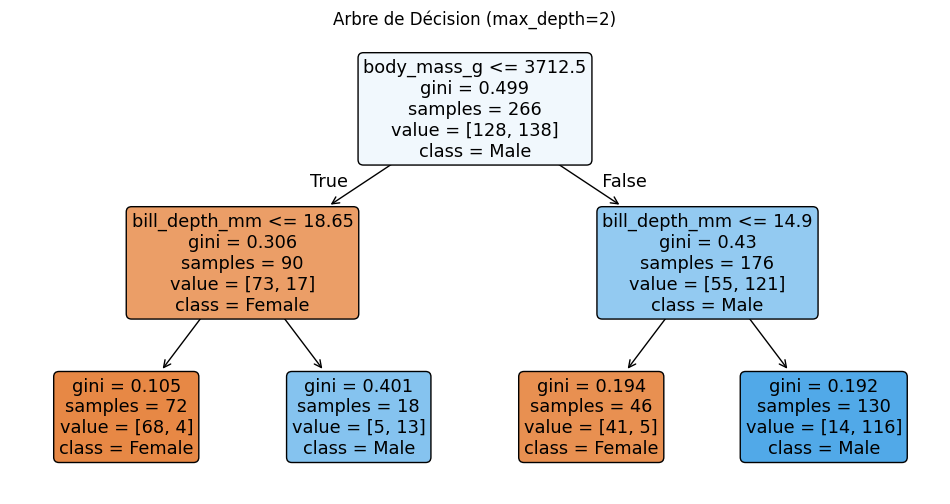

In [35]:
# Exercice 7
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


clf_limited = DecisionTreeClassifier(max_depth=2, random_state=42)
clf_limited.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(clf_limited, feature_names=X.columns, filled=True, rounded=True, class_names=clf_limited.classes_)
plt.title("Arbre de Décision (max_depth=2)")
plt.show()



# EN

# Effects of Changing the Maximum Depth
In this section, we're going to see how changing the max_depth, which is one of the most important hyperparameters when it comes to decision trees, plays a part in the prediction accuracy.

*** This exercise is only done for you to see how big of an impact choosing the correct max_depth is!***

Choosing the correct max_depth (or any other hyperparameter for that matter) is typically done using cross validation or a more advanced technique (Grid Search, Random Search, Bayesian Optimization).

# Machine Learning Optimization
Using the above dataset, fit and predict the train and test sets using a max_depth from 1 to 10. For example, within the first iteration, you would fit the xtrain and ytrain datasets using max_depth=1, predict the xtest using this model, and then record the accuracy. On the next iteration, the max_depth would then be 2, etc.


# FR
# Effets de la modification de la profondeur maximale
Dans cette section, nous allons voir comment la modification de max_depth joue un rôle dans la précision de la prédiction. C'est l'un des hyperparamètres les plus importants pour les arbres de décision.

*** Cet exercice n'est fait que pour vous permettre de voir l'impact du choix de la profondeur max_correcte ! ***

Le choix de la profondeur max_correcte (ou de tout autre hyperparamètre d'ailleurs) se fait généralement à l'aide d'une validation croisée ou d'une technique plus avancée (Recherche par grille, recherche aléatoire, optimisation bayésienne).

# Optimisation d'algorithmes :
À l'aide de l'ensemble de données ci-dessus, ajustez et prédisez les ensembles d'entraînement et de test à l'aide d'un max_depth de 1 à 10.

***Vous allez faire varier la valeur max_depth du decision tree et l'entraîner pour obtenir le score (train et test) sur chaque changement de max_depth. Ce sera une boucle d'entraînement. ***

Par exemple, dans la première itération, vous ajusterez les ensembles de données xtrain et ytrain à l'aide de max_depth = 1, prédisez le xtest à l'aide de ce modèle, et puis enregistrez la précision. À la prochaine itération, le max_depth serait alors de 2, etc.

# Exercice 8

# EN
- Using a random state of 42, fit multiple decision trees with various max depths.
- Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))

# FR
- En utilisant un état aléatoire de 42, ajustez plusieurs arbres de décision avec différentes profondeurs maximales (max_depth).
- Enregistrez ces précisions dans une liste (c'est-à-dire list_of_accuracies.append(accuracy))

In [36]:
# Using a random state of 42, fit multiple decision trees with various max depths.
# Record these accuracies in a list (i.e. list_of_accuracies.append(accuracy))
list_of_accuracies_train = []
list_of_accuracies_test = []
for i in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=i, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    list_of_accuracies_train.append(train_accuracy)
    list_of_accuracies_test.append(test_accuracy)

print("Précisions sur l'ensemble d'entraînement :", list_of_accuracies_train)
print("Précisions sur l'ensemble de test :", list_of_accuracies_test)



Précisions sur l'ensemble d'entraînement : [0.7293233082706767, 0.8947368421052632, 0.9285714285714286, 0.9360902255639098, 0.9586466165413534, 0.9736842105263158, 0.9887218045112782, 0.9924812030075187, 0.9962406015037594, 0.9962406015037594]
Précisions sur l'ensemble de test : [0.7014925373134329, 0.8208955223880597, 0.835820895522388, 0.8656716417910447, 0.835820895522388, 0.8059701492537313, 0.8656716417910447, 0.8805970149253731, 0.8805970149253731, 0.8805970149253731]


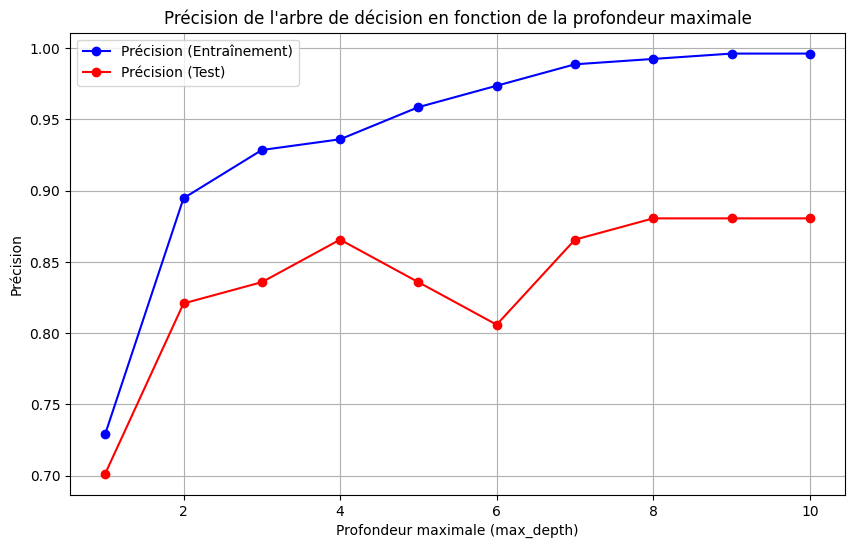

In [37]:
# Plot these accuracies using matplotlib with the accuracies on the y-axis and the max_depth on the x-axis.
import matplotlib.pyplot as plt

# Tracer les précisions
plt.figure(figsize=(10, 6))

# Tracer la précision sur l'ensemble d'entraînement
plt.plot(range(1, 11), list_of_accuracies_train, label='Précision (Entraînement)', marker='o', linestyle='-', color='b')

# Tracer la précision sur l'ensemble de test
plt.plot(range(1, 11), list_of_accuracies_test, label='Précision (Test)', marker='o', linestyle='-', color='r')

# Ajouter des labels et un titre
plt.xlabel('Profondeur maximale (max_depth)')
plt.ylabel('Précision')
plt.title('Précision de l\'arbre de décision en fonction de la profondeur maximale')

# Afficher la légende
plt.legend()

# Affichage du graphique
plt.grid(True)
plt.show()

